<h1 style="color:RED" align="center">Handwritten digits(MNIST Dataset) classification using ANN, CNN, SVM, KNN, and some other classifiers as well and comparing all these classifiers using GridSearchCV</h1>

#### The aim of this  part of the project we is use Artificial Neural Network(ANN) with and without a hidden layer, Convoluted Neural Networks(CNN) and Support Vector Machines(SVM) and K Nearest Neighbours(KNN) and other popular classifiers to classify handwritten digits and compare their accuracy using GridSearchCV. The very famous but hard to load with MNIST dataset has been chosen. Hyper parameter tuning for all the classifiers are done using GridSearchCV too.

### Importing all the necessary libraries

In [1]:
import pandas as pd
import numpy as np
import tensorflow as tf
from tensorflow import keras
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn import svm
from sklearn import neighbors, metrics

#### We load the dataset and split it into traing and test dataset. If you try to download the dataset without using keras, then it will be tough as the dataset is in the form of 4 binary files(X_train, X_test, y_train and y_test) which need to be compiled using extra code to get the training and testing data.

#### So I recommend using keras to load the dataset as shown below.

In [2]:
(X_train, y_train) , (X_test, y_test) = keras.datasets.mnist.load_data()

In [7]:
len(X_test)

10000

In [8]:
X_train[5]

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,  13,  25, 100, 122,   7,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  

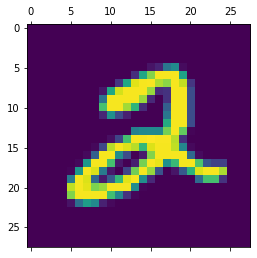

In [9]:
plt.matshow(X_train[5])

In [10]:
y_train[5]

2

## Using SVM

#### Support Vector Machines

#### Scaling the training and test data into the range (0,1) for a faster model training and testing and for increasing the accuracy of the model. This is helpful for SVM, KNN, ANN, CNN and all other models

In [3]:
X_train = X_train / 255.0
X_test = X_test / 255.0

#### Flattening the training and test data for easier model training

In [12]:
X_train.shape

(60000, 28, 28)

In [4]:
X_train_flattened = X_train.reshape(len(X_train), 28*28)
X_test_flattened = X_test.reshape(len(X_test), 28*28)

In [14]:
X_train_flattened.shape

(60000, 784)

In [15]:
X_train_flattened[10]

array([0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.     

#### Importing the SVM model from sklearn library

#### The values of C and gamma are found to be 5 and 0.05 respectively using hyperparameter tuning done using GridSearchCrossValidation

In [5]:
from sklearn.model_selection import GridSearchCV
from sklearn import svm
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.naive_bayes import MultinomialNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

In [21]:
model_parameters = {
    'svm': {
        'model': svm.SVC(gamma='auto'),
        'params' : {
            'C': [1,5,10],
            'kernel': ['rbf','linear']
        }  
    }        
}

####  We provide a smaller dataset ,i.e, X_test_p(10,000 datapoints) instead of X_train(60,000 datapoints) SVM which is computationally expensive 

### Doing preprocessing to improve the speed of GridSearch Cross Validation

In [6]:
from sklearn import preprocessing
X_test_p = preprocessing.scale(X_test_flattened) 

In [24]:
scores = []

for model_name, mp in model_parameters.items():
    clf =  GridSearchCV(mp['model'], mp['params'], cv=2, return_train_score=False)
    clf.fit(X_test_p, y_test)
    scores.append({
        'model': model_name,
        'best_score': clf.best_score_,
        'best_params': clf.best_params_
    })
    
df = pd.DataFrame(scores,columns=['model','best_score','best_params'])
df

,model,best_score,best_params
0,svm,0.911,"{'C': 5, 'kernel': 'rbf'}"


#### As evident the best score of svm is  is 0.911 when gamma =0.05, c=5 and kernel is rbf. So we will use these parameters to get the SVM with highest accuracy

#### Eventhough linear kernel is faster, rbf kernel has higher accuracy over this dataset

In [29]:
from sklearn.svm import SVC
SVM = SVC(C = 5,gamma=0.05)

#### SVM model fitting is extemely computationally demanding. It will take more than 20 minutes if GPU is not used 

In [30]:
SVM.fit(X_train_flattened, y_train)

SVC(C=5, gamma=0.05)

In [31]:
SVM.score(X_test_flattened, y_test)

0.9837

#### The SVM model after doing hyper parameter tuning has a great accuracy of 98.37%

## KNN

In [32]:
from sklearn import neighbors, metrics

#### Here too we have used the best parameters found using GridSearchCV

In [33]:
knn = neighbors.KNeighborsClassifier(n_neighbors = 5).fit(X_train_flattened,y_train)

In [34]:
knn.score(X_test_flattened, y_test)

0.9688

### KNN model has a good accuracy of 96.88%


## Aritficial  Neural Network(ANN) with no hidden layers

#### As the output is mutually exclusive we use sparse_categorical_cross_entropy

#### This Neural Network has 13 neurons in the single  layer, and taken the flattened data as input. Sigmoid function is used as the activation function

#### We are using the optimizer Adam.

In [61]:
ann_no_hidden = keras.Sequential([ keras.layers.Dense(13, input_shape=(784,), activation='sigmoid')])

ann_no_hidden.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

ann_no_hidden.fit(X_train_flattened, y_train, epochs=20)

Epoch 1/20
1875/1875 [==============================] - 2s 880us/step - loss: 0.4761 - accuracy: 0.8771
Epoch 2/20
1875/1875 [==============================] - 2s 827us/step - loss: 0.3044 - accuracy: 0.9150
Epoch 3/20
1875/1875 [==============================] - 1s 785us/step - loss: 0.2834 - accuracy: 0.9212
Epoch 4/20
1875/1875 [==============================] - 1s 759us/step - loss: 0.2730 - accuracy: 0.9239
Epoch 5/20
1875/1875 [==============================] - 1s 796us/step - loss: 0.2667 - accuracy: 0.9259
Epoch 6/20
1875/1875 [==============================] - 1s 766us/step - loss: 0.2619 - accuracy: 0.9273
Epoch 7/20
1875/1875 [==============================] - 2s 895us/step - loss: 0.2583 - accuracy: 0.9291
Epoch 8/20
1875/1875 [==============================] - 2s 920us/step - loss: 0.2554 - accuracy: 0.9291
Epoch 9/20
1875/1875 [==============================] - 2s 854us/step - loss: 0.2528 - accuracy: 0.9293
Epoch 10/20
1875/1875 [==============================] - 2s 847u

In [62]:
ann_no_hidden.evaluate(X_test_flattened, y_test)

313/313 [==============================] - 0s 630us/step - loss: 0.2701 - accuracy: 0.9262


[0.2701132297515869, 0.9261999726295471]

### The accuracy of the ANN model with no hidden nodes is 92.62%

In [54]:
y_predicted = ann_no_hidden.predict(X_test_flattened)
y_predicted[5]

array([7.6799624e-05, 9.9835289e-01, 5.4261684e-01, 4.0314528e-01,
       1.4410168e-02, 1.9787103e-02, 9.0015829e-03, 5.9560734e-01,
       5.4674876e-01, 2.0121735e-01, 5.9841903e-05, 5.2245483e-05,
       6.3474028e-05], dtype=float32)

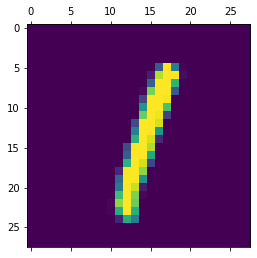

In [55]:
plt.matshow(X_test[5])

**np.argmax finds a maximum element  from an array and returns the index of it**

In [56]:
np.argmax(y_predicted[5])

1

#### For this case the ANN model with no hidden layers predicted 1 and the true output is also 1. Hence the ANN model predicted correctly

In [57]:
predicted = [np.argmax(i) for i in y_predicted]

In [58]:
predicted[:10]

[7, 2, 1, 0, 4, 1, 4, 9, 6, 9]

In [59]:
y_test[:10]

array([7, 2, 1, 0, 4, 1, 4, 9, 5, 9], dtype=uint8)

#### As evident the ANN model with no hidden layers was able to predict the first 5 test cases with 100% accuracy.

#### Confusion Matrix

Text(69.0, 0.5, 'Truth')

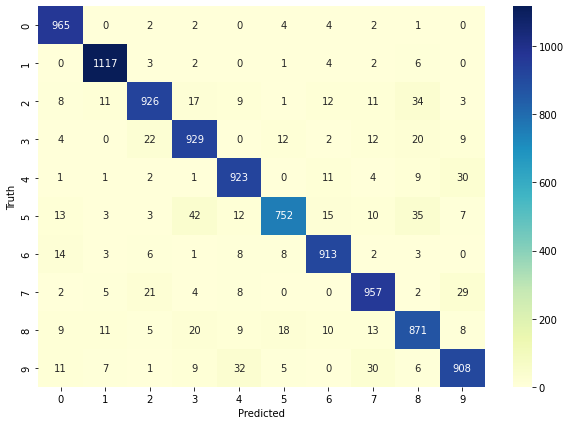

In [60]:
import seaborn as sn
cm = tf.math.confusion_matrix(labels=y_test,predictions=predicted)
plt.figure(figsize = (10,7))
sn.heatmap(cm, annot=True, fmt='d',cmap="YlGnBu")
plt.xlabel('Predicted')
plt.ylabel('Truth')

## ANN Model with a single hidden layer

#### This ANN Model has one hidden layer. Hence it is also called dense neural network

#### We have used relu activation function for the first layer. It is a commonly used activation function inn Machine Learning and Neural Networks. It is a piecewise linear function which will output the input directly if it is positive otherwirse  it will output zero.

#### Relu like linear function is computationally less expensive 

#### Here too the input is flattened so the input shape is (784,)

In [49]:
ann_with_hidden = keras.Sequential([
    keras.layers.Dense(100, input_shape=(784,), activation='relu'),
    keras.layers.Dense(10, activation='sigmoid')
])

ann_with_hidden.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

ann_with_hidden.fit(X_train_flattened, y_train, epochs=20)

Epoch 1/20
1875/1875 [==============================] - 2s 1ms/step - loss: 0.2727 - accuracy: 0.9222
Epoch 2/20
1875/1875 [==============================] - 2s 1ms/step - loss: 0.1218 - accuracy: 0.9633
Epoch 3/20
1875/1875 [==============================] - 2s 1ms/step - loss: 0.0855 - accuracy: 0.9742
Epoch 4/20
1875/1875 [==============================] - 2s 1ms/step - loss: 0.0641 - accuracy: 0.9805
Epoch 5/20
1875/1875 [==============================] - 2s 1ms/step - loss: 0.0511 - accuracy: 0.9839
Epoch 6/20
1875/1875 [==============================] - 2s 1ms/step - loss: 0.0393 - accuracy: 0.9886
Epoch 7/20
1875/1875 [==============================] - 2s 1ms/step - loss: 0.0331 - accuracy: 0.9899
Epoch 8/20
1875/1875 [==============================] - 2s 1ms/step - loss: 0.0269 - accuracy: 0.9914
Epoch 9/20
1875/1875 [==============================] - 2s 1ms/step - loss: 0.0233 - accuracy: 0.9929
Epoch 10/20
1875/1875 [==============================] - 2s 1ms/step - loss: 0.018

In [63]:
ann_with_hidden.evaluate(X_test_flattened,y_test)

313/313 [==============================] - 0s 808us/step - loss: 0.1045 - accuracy: 0.9780


[0.10445991158485413, 0.9779999852180481]

### The ANN model with a single hidden layer has an accuracy of 97.80%

### This is a huge improvement over the 92.62% of the ANN model without a hidden layer

In [64]:
predicted = [np.argmax(i) for i in y_predicted]

In [65]:
predicted[:10]

[7, 2, 1, 0, 4, 1, 4, 9, 6, 9]

In [66]:
y_test[:10]

array([7, 2, 1, 0, 4, 1, 4, 9, 5, 9], dtype=uint8)

#### As evident the ANN model with  hidden layers was able to predict the first 5 test cases with 100% accuracy.

#### Confusion Matrix

Text(69.0, 0.5, 'Truth')

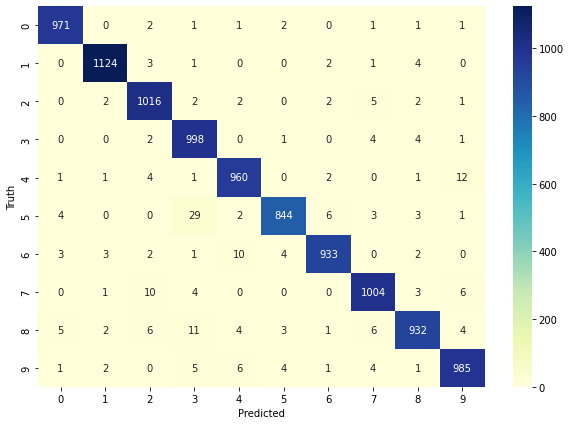

In [69]:
y_predicted = ann_with_hidden.predict(X_test_flattened)
predicted = [np.argmax(i) for i in y_predicted]
cm = tf.math.confusion_matrix(labels=y_test,predictions=predicted)

plt.figure(figsize = (10,7))
sn.heatmap(cm, annot=True, fmt='d',cmap="YlGnBu")
plt.xlabel('Predicted')
plt.ylabel('Truth')

# CNN

#### Using the same dataset to make the model and predictions using CNN

#### Ensuring y_train is a 1D array

In [70]:
y_train

array([5, 0, 4, ..., 5, 6, 8], dtype=uint8)

#### Reshaping is neccessary for the training data to be used as input when creating CNN model using Keras

In [71]:
X_train= X_train.reshape(-1,28,28,1)
X_test= X_test.reshape(-1,28,28,1)

#### We use softmax activation function in Multiclass classification problems. Sigmoid function can also be used in this case.

### In CNN we use 100 epochs but in ANN we use 20 epochs as CNN is faster and less computationally expensive

In [76]:
cnn = keras.Sequential([
    
    # cnn
    keras.layers.Conv2D(filters = 3, kernel_size = (3,3), activation = 'relu', input_shape = (28,28,1)),
    keras.layers.MaxPooling2D((3,3)),
    
    # dense layer
    keras.layers.Flatten(input_shape=(28, 28)),
    keras.layers.Dense(100, activation='relu'),
    keras.layers.Dense(10, activation='softmax')
])
cnn.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

cnn.fit(X_train, y_train, epochs=100)

Epoch 1/100
1875/1875 [==============================] - 7s 4ms/step - loss: 0.2878 - accuracy: 0.9175
Epoch 2/100
1875/1875 [==============================] - 7s 4ms/step - loss: 0.1167 - accuracy: 0.9644
Epoch 3/100
1875/1875 [==============================] - 7s 4ms/step - loss: 0.0863 - accuracy: 0.9733
Epoch 4/100
1875/1875 [==============================] - 7s 4ms/step - loss: 0.0704 - accuracy: 0.9779
Epoch 5/100
1875/1875 [==============================] - 7s 4ms/step - loss: 0.0597 - accuracy: 0.9813
Epoch 6/100
1875/1875 [==============================] - 7s 4ms/step - loss: 0.0511 - accuracy: 0.9837
Epoch 7/100
1875/1875 [==============================] - 7s 4ms/step - loss: 0.0456 - accuracy: 0.9848
Epoch 8/100
1875/1875 [==============================] - 7s 4ms/step - loss: 0.0398 - accuracy: 0.9875
Epoch 9/100
1875/1875 [==============================] - 7s 4ms/step - loss: 0.0356 - accuracy: 0.9889
Epoch 10/100
1875/1875 [==============================] - 7s 4ms/step - l

### The CNN model has an insanely high accuracy of over 99.8% on the training dataset

In [78]:
cnn.evaluate(X_test,y_test)

313/313 [==============================] - 1s 2ms/step - loss: 0.1544 - accuracy: 0.9830


[0.1543532907962799, 0.9829999804496765]

### CNN model has an insanely high accuracy of over 98%

#### The high accuracy is due to the ability of CNN model to use of pooling layer efficiently in this dataset

#### Here there are three detectors like vertical line detector, loopy pattern detector and diagonal line detector etc

# GridSearchCV 


## Comparing the best classifiers using GridSearchCV

#### As we already know C=5, gamma = 0.05 and kernel ='rbf' are the best parameters for SVM we will not repeat that step again as it is computationally expensive

In [7]:
model_params = {
    'svm': {
        'model': svm.SVC(gamma='auto'),
        'params' : {
            'C': [5],
            'kernel': ['rbf']
        }  
    },
    'random_forest': {
        'model': RandomForestClassifier(),
        'params' : {
            'n_estimators': [1,5,10]
        }
    },
    'logistic_regression' : {
        'model': LogisticRegression(solver='liblinear',multi_class='auto'),
        'params': {
            'C': [1,5,10]
        }
    },
    'naive_bayes_gaussian': {
        'model': GaussianNB(),
        'params': {}
    },
    'k_nearest_neighbors':{
       'model': KNeighborsClassifier(),
       'params':{
           'n_neighbors':[1,5,10],
       }
    },
    'linear_discriminant_analysis':{
        'model': LinearDiscriminantAnalysis(),
        'params':{}
    },
    'decision_tree': {
        'model': DecisionTreeClassifier(),
        'params': {
            'criterion': ['gini','entropy'],   
        }
    }     
}

#### We will be using a smaller dataset for doing GridSearchCV. Hence we use X_test_p (10,000 datapoints) rather than X_train_flattened(60,000 datapoints)

In [8]:
scores = []

for model_name, mp in model_params.items():
    clf =  GridSearchCV(mp['model'], mp['params'], cv=5, return_train_score=False)
    clf.fit(X_test_p, y_test)
    scores.append({
        'model': model_name,
        'best_score': clf.best_score_,
        'best_params': clf.best_params_
    })
    
df = pd.DataFrame(scores,columns=['model','best_score','best_params'])
df

,model,best_score,best_params
0,svm,0.9420,"{'C': 5, 'kernel': 'rbf'}"
1,random_forest,0.9020,{'n_estimators': 10}
2,logistic_regression,0.8785,{'C': 1}
3,naive_bayes_gaussian,0.5469,{}
4,k_nearest_neighbors,0.9033,{'n_neighbors': 5}
5,linear_discriminant_analysis,0.5366,{}
6,decision_tree,0.7995,{'criterion': 'entropy'}


### From GridSearchCV the order of accuracy of Classifiers is 

## Support Vector Machines(94.2%)  > K_Nearest_Neighbors(90.33%) > Random Forest(90.20%) > Logistic Regression(87.85%) > Decision Tree (79.95%) > Naive Bayes Gaussian(54.69%) > Linear Discriminant Analysis(53.66%)

### Adding the ANN,CNN model to the comparison of Classifiers

###  Training and testing using all classifiers over the entire 60,000 datapoints will take too much time. So we compare the ANN and CNN models we made with the classifier which performed best over the smaller dataset  with 10,000 datapoints(X_test_p)

### As SVM has the highest accuracy among the above classifiers we compare its accuracy with CNN, ANN 

# SVM(98.38%) > CNN(98.30) > ANN(With hidden layer)(97.80%) > ANN(Without hidden layer)(92.62%) 